# Example Neural Network

Standalone network from [a nice example from James Loy](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)

This implements the network in this figure:

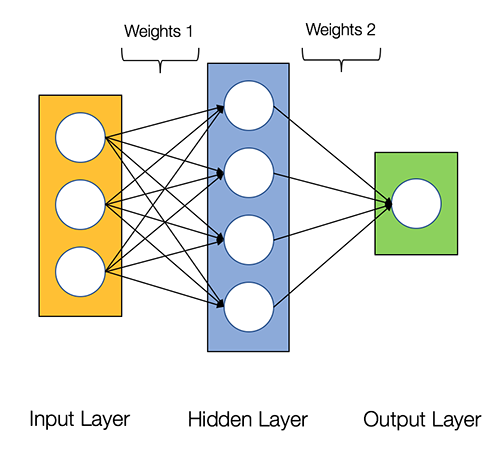

## Write the network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid activiation function and derivative for back propagation

In [2]:

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

#### Plot sigmoid and derivative. 

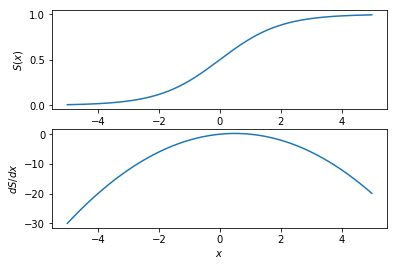

In [3]:
plt.figure()
x = np.arange(-5,5,0.01)
plt.subplot(211)
plt.plot(x, sigmoid(x))
plt.xlabel('$x$')
plt.ylabel('$S(x)$')
plt.subplot(212)
plt.plot(x, sigmoid_derivative(x))
plt.xlabel('$x$')
plt.ylabel('$dS/dx$')
plt.show()

### Neural Network class

In [4]:

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

## Main execution

[[0.01029195]
 [0.97008199]
 [0.96907369]
 [0.03537604]]


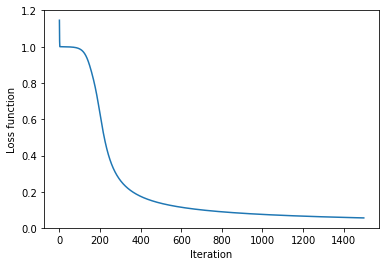

In [6]:
X = np.array([[0,0,1], # Should return "0"
              [0,1,1], # Should return "1"
              [1,0,1], # Should return "1"
              [1,1,1]])# Should return "0"
y = np.array([[0],[1],[1],[0]]) # Labels of inputs
nn = NeuralNetwork(X,y) # Make the NN

# Perform the FF/BP iterations. Keep a plot of the loss function.
loss = []
for i in range(1500):
    nn.feedforward()
    nn.backprop()
    loss.append( np.linalg.norm( nn.y - nn.output) )

# Print the output.
print(nn.output)
# Plot the loss function
plt.figure()
plt.plot( np.arange(1500), loss )
plt.xlabel("Iteration")
plt.ylabel("Loss function")
plt.show()
